In [ ]:
!pip install easyocr
!pip install imutils
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

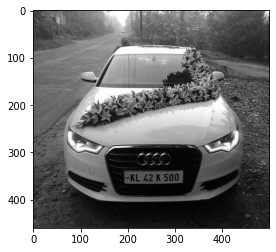

In [ ]:
img = cv2.imread("/content/cars/wedding-car-rental-service-wandoor-500x500.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

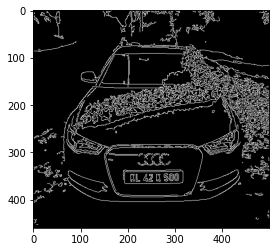

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:

location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour , 10 ,True)
  if (len(approx) == 4) and (abs((approx[3][0])-(approx[0][0]))[1] <= 60) :#will eliminate very small polygun in length
    location = approx
    break

#a=((approx[3][0])-(approx[0][0]))[1]
#print(abs(a))

In [ ]:
location

array([[[316, 341]],

       [[310, 365]],

       [[193, 364]],

       [[195, 340]]], dtype=int32)

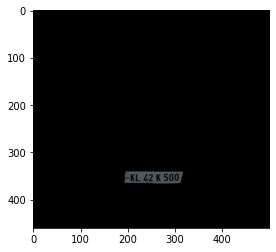

In [ ]:
try:
  mask = np.zeros(gray.shape, np.uint8)
  new_image = cv2.drawContours(mask, [location], 0,255, -1)
  new_image = cv2.bitwise_and(img, img, mask=mask)
  plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
except:
  print("Number plate not recognized.Wrong picture orientation,Try another picture")

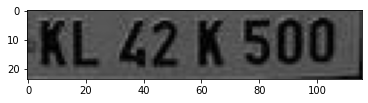

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1+2:x2+1, y1+8:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [110, 0], [110, 24], [0, 24]], 'KL L2 K 500', 0.6460481994711322)]

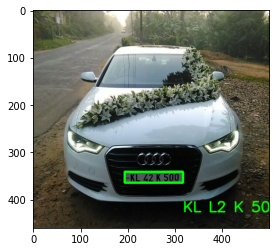

In [ ]:
  text = result[0][-2]
  font = cv2.FONT_HERSHEY_SIMPLEX
  res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
  res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
  plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
print("Car Registration Number:", result[0][-2])


Car Registration Number: KL L2 K 500
